# rotate crazy hat

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

read the dataset

In [99]:
path=os.getcwd()
print(path)
crazy_hat=pd.read_csv("data/crazy-hat.tsv")

C:\Users\Zhu\OneDrive - UW\574


In [100]:
df=pd.DataFrame(crazy_hat)
df

,x\ty\tgroup
0,0\t22\toutline
1,16\t-18\toutline
2,-16\t-18\toutline
3,0\t22\toutline
4,-3\t7\tleye
5,-3\t14\tleye
6,2\t7\treye
7,2\t14\treye
8,-11\t-10\tmouth
9,-7\t-17\tmouth


split the string

In [101]:
df['split']= df['x\ty\tgroup'].str.split('\t')

organize the string to different columns, x, y, group

In [102]:
df['group']=df['split'].str[2]
df['x']=df['split'].str[0]
df['y']=df['split'].str[1]
df['x']=df['x'].astype(int)
df['y']=df['y'].astype(int)

In [103]:
df=pd.DataFrame(df,columns=['x','y','group'])
df

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye
5,-3,14,leye
6,2,7,reye
7,2,14,reye
8,-11,-10,mouth
9,-7,-17,mouth


get the names of different groups

In [104]:
unique=df.group.unique().astype(str)
unique

array(['outline', 'leye', 'reye', 'mouth'], dtype='<U7')

create a dictionary for the style of different lines, use tuple and rgb codes

In [105]:
dict={'outline':(1,'black'),'leye':(1,'brown'),'reye':(1,'brown'),'mouth':(2,'red')}

define a function

In [106]:
def hat(a,u):
    ax = plt.axes(label='image')
    ax.plot(a[:,0], a[:,1],linewidth=dict[u][0], c=dict[u][1])
    ax.set_aspect('equal') 
    #plt.show()

use a loop to fill the matrix for different groups

C:\Users\Zhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


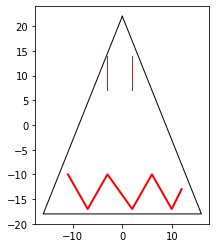

In [107]:
i=0
U=[]
for u in unique:
    a=np.array([df.iloc[i].x.astype(int),df.iloc[i].y.astype(int)])
    while i<15:
        if df.iloc[i].group==u:
            b=np.array([df.iloc[i].x.astype(int),df.iloc[i].y.astype(int)])
            a=np.vstack((a,b))
            i+=1
        else:
            break
    hat(a,u)
    U.append(a)
plt.show()

<font color=orange>
I tried a million times googling for solutions to use methods of "hints". And I succeeded finally!  
I don't want to delete the original silly cells.  
I can feel tears and pains through the draft cells.
</font>

C:\Users\Zhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


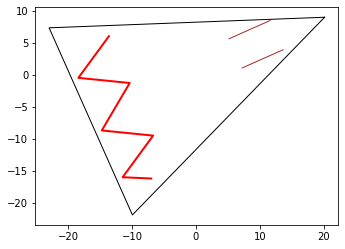

In [108]:
i=0
r=66*np.pi/180
R=np.array([[np.cos(r), -np.sin(r)],[np.sin(r),np.cos(r)]])
for u in unique:
    a=np.array([df.iloc[i].x.astype(int),df.iloc[i].y.astype(int)])
    while i<15:
        if df.iloc[i].group==u:
            b=np.array([df.iloc[i].x.astype(int),df.iloc[i].y.astype(int)])
            a=np.vstack((a,b))
            i+=1
        else:
            break
    hat(a @ R,u)
plt.show()

# manipulate images

<font color=purple>
    plt.gca().invert_xaxis()   </font>  
this could flip the image by invert x axis

In [109]:
fx=np.array([[-1,0],[0,1]])#the flip-x matrix Fx that flips (mirrors) the image on y axis
sx=np.array([[1,0],[0,2]])#the stretch-y matrix Sy(s),stretch (or squish) the y components by amount s while leaving x components untouched

C:\Users\Zhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


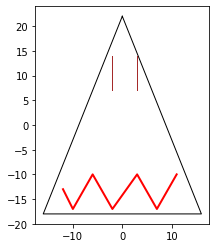

In [110]:
i=0
for u in unique:
    a=np.array([df.iloc[i].x.astype(int),df.iloc[i].y.astype(int)])
    while i<15:
        if df.iloc[i].group==u:
            b=np.array([df.iloc[i].x.astype(int),df.iloc[i].y.astype(int)])
            a=np.vstack((a,b))
            i+=1
        else:
            break
    hat(a @ fx,u)
plt.show()

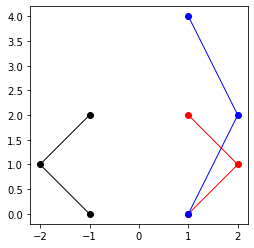

In [111]:
t=np.array([[1,2],[2,1],[1,0]])
tf=t@fx
ts=t@sx
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(tf[:,0], tf[:,1],marker='o',linewidth=1, c='black') #flip plot
ax.plot(t[:,0], t[:,1],marker='o',linewidth=1, c='red')#original plot
ax.plot(ts[:,0], ts[:,1],marker='o',linewidth=1, c='blue')#stretch plot
ax.set_aspect('equal') 
plt.show()

In [112]:
r1=-45*np.pi/180 #radiance of rotating 45 degree counterclockwise
R1=np.array([[np.cos(r1),-np.sin(r1)],[np.sin(r1),np.cos(r1)]])
r2=45*np.pi/180 #radiance of rotating 45 degree clockwise
R2=np.array([[np.cos(r2),-np.sin(r2)],[np.sin(r2),np.cos(r2)]])

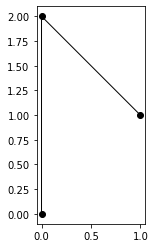

In [113]:
sample=np.array([[0,0],[0,2],[1,1]])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sample[:,0], sample[:,1],marker='o',linewidth=1, c='black')
ax.set_aspect('equal') 
plt.show()

rotate 45 degrees counterclockwise

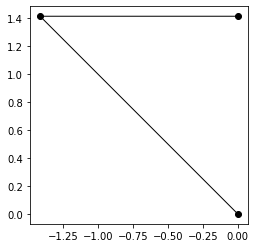

In [114]:
s1= sample @ R1
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(s1[:,0], s1[:,1],marker='o',linewidth=1, c='black') 
ax.set_aspect('equal') 
plt.show()

flip

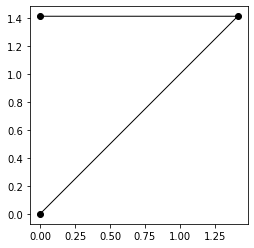

In [115]:
s2=s1 @ fx
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(s2[:,0], s2[:,1],marker='o',linewidth=1, c='black') 
ax.set_aspect('equal') 
plt.show()

stretch

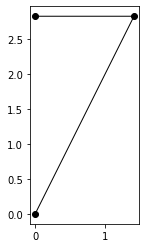

In [116]:
s3 = s2 @ sx
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(s3[:,0], s3[:,1],marker='o',linewidth=1, c='black') #flip plot
ax.set_aspect('equal') 
plt.show()

rotate by 45 degrees clockwise

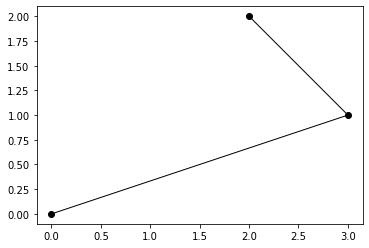

In [117]:
s4= s3 @ R2
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(s4[:,0], s4[:,1],marker='o',linewidth=1, c='black') 
ax.set_aspect('equal') 
plt.show()

(A @ B) @ C = A @ (B @ C)

In [118]:
X=R1 @ fx @ sx @ R2
X

array([[0.5, 1.5],
       [1.5, 0.5]])

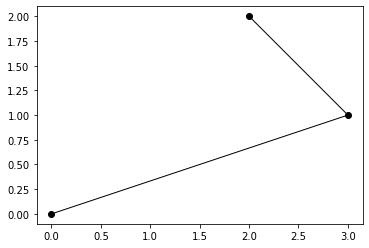

In [119]:
s5=sample @ X
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(s5[:,0], s5[:,1],marker='o',linewidth=1, c='black') 
ax.set_aspect('equal') 
plt.show()

X is the a single linear transformation matrix.

# Manipulate bitmap images

the sample

图片的坐标，左上角是（0,0）

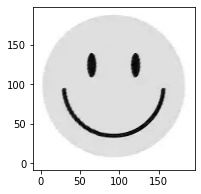

In [10]:
from matplotlib.image import imread
img = imread('smiley.png')
# note: rows x columns x colors (not width x height!)
R = img[:,:,1] # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),#第二列放在x
                     np.arange(R.shape[0], 0, -1)) #第一列放在y
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

plot dont-own-tv.png in an analogous fashion

In [4]:
from matplotlib.image import imread
img = imread('dont-own-tv.png')
R = img[:,:,2] # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()
#get the shape size in order to calculate for the exact stretch matrix

NameError: name 'np' is not defined

In [133]:
img.shape

(509, 806, 3)

stretch

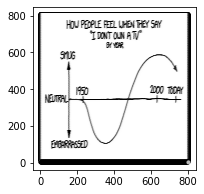

In [122]:
sx2=([[1,0],[0,300/189]])# adjust the stretch matrix to make it nearly squared
v = X @ sx2
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(v[:,0], v[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
fig.savefig('picture.png',dpi=600)

crop the arrowhead

In [2]:
from PIL import Image
im = Image.open("picture.png")
im.size

(1800, 1800)

I tried again and again to locate the arrowhead.

crop the arrowhead

In [139]:
crop_rectangle =((1333,692,1467,833))
cropped_im = im.crop(crop_rectangle)
cropped_im.show()

rotate it and save the image

In [140]:
rotated_im=cropped_im.rotate(235)
rotated_im.show()
rotated_im.save("rotated_im.png")

I don't know how to do it, so I used the same method as above.

In [7]:
img2 = imread('rotated_im.png')
img2.shape

(141, 134, 4)

In [142]:
from matplotlib.colors import LinearSegmentedColormap
color=['red','white']
cm=LinearSegmentedColormap.from_list('arrow',color, N=256)

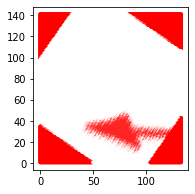

In [143]:
R = img2[:,:,2] # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap=cm)
ax.set_aspect('equal')
plt.show()

If I use the cropped image, there wouldn't be the four cornors. And I really don't know how to exclude these cornors.

# my draft cells with tears and pains

A=np.array([[0,22],[16,-18],[-16,-18],[0,22]])
B=np.array([[-3,7],[-3,14]])
C=np.array([[2,7],[2,14]])
D=np.array([[-11,-10],[-7,-17],[-3,-10],[2,-17],[6,-10],[10,-17],[12,-13]])

import math
nrows = int(math.ceil(len(grouped)/2.))
#fig, axs = plt.subplots(nrows,2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for (name, df_hat), ax in zip(grouped, axs.flat):
    df_hat.plot(x='x',y='y', ax=ax)


df['position']=df['x'].str[:2]

from PIL import Image
im = Image.open("dont-own-tv.png")
pixels=im.load()
#\crop_rectangle = (50, 50, 200, 200)
#cropped_im = im.crop(crop_rectangle)
#cropped_im.show()
print (pixels[200,200])

im.size

a=np.array([0,0])
for x in range(600,806):
    for y in range (200,509):
        if pixels[x,y]==(241,31,31):
            b=np.array([x,y])
            a=np.vstack((a,b))

A=np.delete(U[0],0,0)
B=U[1]
C=U[2]
D=U[3]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(A[:,0], A[:,1],marker='o',linewidth=1, c='black')
ax.plot(B[:,0], B[:,1],marker='o',linewidth=1, c='brown')
ax.plot(C[:,0], C[:,1],marker='o',linewidth=1, c='brown')
ax.plot(D[:,0], D[:,1],marker='o',linewidth=2, c='red')
ax.set_aspect('equal') 
plt.show()

Ar=A @ R
Br=B @ R
Cr=C @ R
Dr=D @ R
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Ar[:,0], Ar[:,1],linewidth=1, c='black')
ax.plot(Br[:,0], Br[:,1],linewidth=1, c='brown')
ax.plot(Cr[:,0], Cr[:,1],linewidth=1, c='brown')
ax.plot(Dr[:,0], Dr[:,1],linewidth=2, c='red')
ax.set_aspect('equal') 
plt.show()

pixels=im.load()
a=np.array([0,0])
ah = LinearSegmentedColormap.from_list('arrow', (1,0,0), N=256,gamma=1.0)
for x in range(1333,1467):
    for y in range (692,833):
        #if pixels[x,y]==(241,31,31):
            b=np.array([x,y])
            a=np.vstack((a,b))